In [1]:
import csv

import tensorflow as tf
from keras.models import Sequential
from keras.layers import *
from sklearn import model_selection

import numpy as np
import os

# specify each path and set number of classes

In [2]:
RANDOM_SEED = 42
NUM_CLASSES = 17

dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/GRU_model.hdf5'

# loading training data

In [3]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)


In [4]:
X_train = X_train[:, None, :]
print(X_train.shape)

(3630, 1, 42)


In [5]:
X_test = X_test[:, None, :]
print(X_test.shape)

(1210, 1, 42)


# build model

In [6]:
print(X_train.shape[1],X_train.shape[2])

1 42


In [7]:
model = Sequential()
model.add(GRU(50, return_sequences=True, input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(GRU(50, return_sequences=True, input_shape=(1,2*21)))
model.add(Dropout(0.2))
model.add(GRU(100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(NUM_CLASSES, activation = "softmax"))

# model summary

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 1, 50)             14100     
                                                                 
 gru_1 (GRU)                 (None, 1, 50)             15300     
                                                                 
 dropout (Dropout)           (None, 1, 50)             0         
                                                                 
 gru_2 (GRU)                 (None, 100)               45600     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 17)                1717      
                                                                 
Total params: 76,717
Trainable params: 76,717
Non-traina

In [9]:
# model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# callback for early abort
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

 # model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# model training

In [10]:
model.fit(
    X_train,
    y_train,
    epochs=500,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/500
22/29 [=====================>........] - ETA: 0s - loss: 2.7206 - accuracy: 0.1751
Epoch 00001: saving model to model/keypoint_classifier\GRU_model.hdf5
29/29 [==============================] - 5s 36ms/step - loss: 2.6564 - accuracy: 0.1843 - val_loss: 2.3026 - val_accuracy: 0.1843
Epoch 2/500
26/29 [=========================>....] - ETA: 0s - loss: 2.0765 - accuracy: 0.2070
Epoch 00002: saving model to model/keypoint_classifier\GRU_model.hdf5
29/29 [==============================] - 0s 7ms/step - loss: 2.0621 - accuracy: 0.2105 - val_loss: 1.9275 - val_accuracy: 0.2909
Epoch 3/500
24/29 [=======================>......] - ETA: 0s - loss: 1.9051 - accuracy: 0.2660
Epoch 00003: saving model to model/keypoint_classifier\GRU_model.hdf5
29/29 [==============================] - 0s 7ms/step - loss: 1.9089 - accuracy: 0.2634 - val_loss: 1.8753 - val_accuracy: 0.3215
Epoch 4/500
24/29 [=======================>......] - ETA: 0s - loss: 1.8620 - accuracy: 0.3066
Epoch 00004: saving mo

Epoch 29/500
23/29 [======================>.......] - ETA: 0s - loss: 0.9458 - accuracy: 0.5985
Epoch 00029: saving model to model/keypoint_classifier\GRU_model.hdf5
29/29 [==============================] - 0s 8ms/step - loss: 0.9412 - accuracy: 0.6041 - val_loss: 0.8844 - val_accuracy: 0.6678
Epoch 30/500
21/29 [====================>.........] - ETA: 0s - loss: 0.9433 - accuracy: 0.6053
Epoch 00030: saving model to model/keypoint_classifier\GRU_model.hdf5
29/29 [==============================] - 0s 7ms/step - loss: 0.9382 - accuracy: 0.6110 - val_loss: 0.9030 - val_accuracy: 0.6347
Epoch 31/500
22/29 [=====================>........] - ETA: 0s - loss: 0.9377 - accuracy: 0.6161
Epoch 00031: saving model to model/keypoint_classifier\GRU_model.hdf5
29/29 [==============================] - 0s 10ms/step - loss: 0.9320 - accuracy: 0.6160 - val_loss: 0.8833 - val_accuracy: 0.6579
Epoch 32/500
24/29 [=======================>......] - ETA: 0s - loss: 0.9271 - accuracy: 0.6097
Epoch 00032: savin

Epoch 57/500
25/29 [========================>.....] - ETA: 0s - loss: 0.8477 - accuracy: 0.6441
Epoch 00057: saving model to model/keypoint_classifier\GRU_model.hdf5
29/29 [==============================] - 0s 9ms/step - loss: 0.8400 - accuracy: 0.6490 - val_loss: 0.7905 - val_accuracy: 0.7207
Epoch 58/500
23/29 [======================>.......] - ETA: 0s - loss: 0.8162 - accuracy: 0.6566
Epoch 00058: saving model to model/keypoint_classifier\GRU_model.hdf5
29/29 [==============================] - 0s 8ms/step - loss: 0.8273 - accuracy: 0.6556 - val_loss: 0.8062 - val_accuracy: 0.6826
Epoch 59/500
24/29 [=======================>......] - ETA: 0s - loss: 0.8243 - accuracy: 0.6615
Epoch 00059: saving model to model/keypoint_classifier\GRU_model.hdf5
29/29 [==============================] - 0s 7ms/step - loss: 0.8330 - accuracy: 0.6573 - val_loss: 0.7934 - val_accuracy: 0.6909
Epoch 60/500
29/29 [==============================] - ETA: 0s - loss: 0.8221 - accuracy: 0.6628
Epoch 00060: saving

Epoch 85/500
23/29 [======================>.......] - ETA: 0s - loss: 0.7412 - accuracy: 0.6950
Epoch 00085: saving model to model/keypoint_classifier\GRU_model.hdf5
29/29 [==============================] - 0s 8ms/step - loss: 0.7392 - accuracy: 0.6945 - val_loss: 0.7248 - val_accuracy: 0.7058
Epoch 86/500
18/29 [=================>............] - ETA: 0s - loss: 0.7362 - accuracy: 0.6927
Epoch 00086: saving model to model/keypoint_classifier\GRU_model.hdf5
29/29 [==============================] - 0s 8ms/step - loss: 0.7392 - accuracy: 0.6959 - val_loss: 0.7179 - val_accuracy: 0.7289
Epoch 87/500
22/29 [=====================>........] - ETA: 0s - loss: 0.7151 - accuracy: 0.7053
Epoch 00087: saving model to model/keypoint_classifier\GRU_model.hdf5
29/29 [==============================] - 0s 8ms/step - loss: 0.7344 - accuracy: 0.7014 - val_loss: 0.7111 - val_accuracy: 0.7463
Epoch 88/500
22/29 [=====================>........] - ETA: 0s - loss: 0.7417 - accuracy: 0.6907
Epoch 00088: saving

Epoch 113/500
21/29 [====================>.........] - ETA: 0s - loss: 0.6763 - accuracy: 0.7132
Epoch 00113: saving model to model/keypoint_classifier\GRU_model.hdf5
29/29 [==============================] - 0s 7ms/step - loss: 0.6697 - accuracy: 0.7176 - val_loss: 0.6452 - val_accuracy: 0.7397
Epoch 114/500
22/29 [=====================>........] - ETA: 0s - loss: 0.6499 - accuracy: 0.7301
Epoch 00114: saving model to model/keypoint_classifier\GRU_model.hdf5
29/29 [==============================] - 0s 7ms/step - loss: 0.6526 - accuracy: 0.7306 - val_loss: 0.6394 - val_accuracy: 0.7645
Epoch 115/500
23/29 [======================>.......] - ETA: 0s - loss: 0.6609 - accuracy: 0.7215
Epoch 00115: saving model to model/keypoint_classifier\GRU_model.hdf5
29/29 [==============================] - 0s 8ms/step - loss: 0.6609 - accuracy: 0.7245 - val_loss: 0.6404 - val_accuracy: 0.7603
Epoch 116/500
21/29 [====================>.........] - ETA: 0s - loss: 0.6496 - accuracy: 0.7225
Epoch 00116: sa

29/29 [==============================] - 0s 8ms/step - loss: 0.6129 - accuracy: 0.7446 - val_loss: 0.6010 - val_accuracy: 0.7744
Epoch 141/500
24/29 [=======================>......] - ETA: 0s - loss: 0.6161 - accuracy: 0.7399
Epoch 00141: saving model to model/keypoint_classifier\GRU_model.hdf5
29/29 [==============================] - 0s 9ms/step - loss: 0.6173 - accuracy: 0.7416 - val_loss: 0.6032 - val_accuracy: 0.7884
Epoch 142/500
24/29 [=======================>......] - ETA: 0s - loss: 0.6034 - accuracy: 0.7516
Epoch 00142: saving model to model/keypoint_classifier\GRU_model.hdf5
29/29 [==============================] - 0s 8ms/step - loss: 0.6045 - accuracy: 0.7499 - val_loss: 0.5920 - val_accuracy: 0.7893
Epoch 143/500
24/29 [=======================>......] - ETA: 0s - loss: 0.6211 - accuracy: 0.7425
Epoch 00143: saving model to model/keypoint_classifier\GRU_model.hdf5
29/29 [==============================] - 0s 7ms/step - loss: 0.6170 - accuracy: 0.7435 - val_loss: 0.6264 - val_

24/29 [=======================>......] - ETA: 0s - loss: 0.5623 - accuracy: 0.7705
Epoch 00168: saving model to model/keypoint_classifier\GRU_model.hdf5
29/29 [==============================] - 0s 8ms/step - loss: 0.5651 - accuracy: 0.7686 - val_loss: 0.5521 - val_accuracy: 0.7678
Epoch 169/500
21/29 [====================>.........] - ETA: 0s - loss: 0.5489 - accuracy: 0.7712
Epoch 00169: saving model to model/keypoint_classifier\GRU_model.hdf5
29/29 [==============================] - 0s 8ms/step - loss: 0.5458 - accuracy: 0.7741 - val_loss: 0.5452 - val_accuracy: 0.7926
Epoch 170/500
22/29 [=====================>........] - ETA: 0s - loss: 0.5572 - accuracy: 0.7699
Epoch 00170: saving model to model/keypoint_classifier\GRU_model.hdf5
29/29 [==============================] - 0s 8ms/step - loss: 0.5533 - accuracy: 0.7700 - val_loss: 0.5485 - val_accuracy: 0.7934
Epoch 171/500
23/29 [======================>.......] - ETA: 0s - loss: 0.5351 - accuracy: 0.7812
Epoch 00171: saving model to 

Epoch 196/500
23/29 [======================>.......] - ETA: 0s - loss: 0.5240 - accuracy: 0.7904
Epoch 00196: saving model to model/keypoint_classifier\GRU_model.hdf5
29/29 [==============================] - 0s 7ms/step - loss: 0.5151 - accuracy: 0.7945 - val_loss: 0.5030 - val_accuracy: 0.8074
Epoch 197/500
23/29 [======================>.......] - ETA: 0s - loss: 0.5101 - accuracy: 0.7989
Epoch 00197: saving model to model/keypoint_classifier\GRU_model.hdf5
29/29 [==============================] - 0s 9ms/step - loss: 0.5079 - accuracy: 0.7994 - val_loss: 0.5087 - val_accuracy: 0.8157
Epoch 198/500
23/29 [======================>.......] - ETA: 0s - loss: 0.4949 - accuracy: 0.8057
Epoch 00198: saving model to model/keypoint_classifier\GRU_model.hdf5
29/29 [==============================] - 0s 7ms/step - loss: 0.4900 - accuracy: 0.8063 - val_loss: 0.4846 - val_accuracy: 0.8355
Epoch 199/500
24/29 [=======================>......] - ETA: 0s - loss: 0.4865 - accuracy: 0.7995
Epoch 00199: sa

Epoch 224/500
23/29 [======================>.......] - ETA: 0s - loss: 0.4405 - accuracy: 0.8278
Epoch 00224: saving model to model/keypoint_classifier\GRU_model.hdf5
29/29 [==============================] - 0s 7ms/step - loss: 0.4476 - accuracy: 0.8256 - val_loss: 0.4707 - val_accuracy: 0.8273
Epoch 225/500
24/29 [=======================>......] - ETA: 0s - loss: 0.4450 - accuracy: 0.8255
Epoch 00225: saving model to model/keypoint_classifier\GRU_model.hdf5
29/29 [==============================] - 0s 7ms/step - loss: 0.4507 - accuracy: 0.8237 - val_loss: 0.4596 - val_accuracy: 0.8380
Epoch 226/500
24/29 [=======================>......] - ETA: 0s - loss: 0.4659 - accuracy: 0.8138
Epoch 00226: saving model to model/keypoint_classifier\GRU_model.hdf5
29/29 [==============================] - 0s 7ms/step - loss: 0.4642 - accuracy: 0.8152 - val_loss: 0.4710 - val_accuracy: 0.8264
Epoch 227/500
23/29 [======================>.......] - ETA: 0s - loss: 0.4519 - accuracy: 0.8230
Epoch 00227: sa

Epoch 252/500
24/29 [=======================>......] - ETA: 0s - loss: 0.4071 - accuracy: 0.8307
Epoch 00252: saving model to model/keypoint_classifier\GRU_model.hdf5
29/29 [==============================] - 0s 8ms/step - loss: 0.4125 - accuracy: 0.8284 - val_loss: 0.4250 - val_accuracy: 0.8488
Epoch 253/500
24/29 [=======================>......] - ETA: 0s - loss: 0.4028 - accuracy: 0.8428
Epoch 00253: saving model to model/keypoint_classifier\GRU_model.hdf5
29/29 [==============================] - 0s 7ms/step - loss: 0.4038 - accuracy: 0.8410 - val_loss: 0.4207 - val_accuracy: 0.8579
Epoch 254/500
24/29 [=======================>......] - ETA: 0s - loss: 0.4184 - accuracy: 0.8333
Epoch 00254: saving model to model/keypoint_classifier\GRU_model.hdf5
29/29 [==============================] - 0s 7ms/step - loss: 0.4168 - accuracy: 0.8336 - val_loss: 0.4315 - val_accuracy: 0.8471
Epoch 255/500
23/29 [======================>.......] - ETA: 0s - loss: 0.4194 - accuracy: 0.8322
Epoch 00255: sa

Epoch 280/500
23/29 [======================>.......] - ETA: 0s - loss: 0.3861 - accuracy: 0.8444
Epoch 00280: saving model to model/keypoint_classifier\GRU_model.hdf5
29/29 [==============================] - 0s 7ms/step - loss: 0.3868 - accuracy: 0.8438 - val_loss: 0.4010 - val_accuracy: 0.8612
Epoch 281/500
20/29 [===================>..........] - ETA: 0s - loss: 0.3617 - accuracy: 0.8594
Epoch 00281: saving model to model/keypoint_classifier\GRU_model.hdf5
29/29 [==============================] - 0s 8ms/step - loss: 0.3694 - accuracy: 0.8545 - val_loss: 0.4118 - val_accuracy: 0.8628
Epoch 282/500
23/29 [======================>.......] - ETA: 0s - loss: 0.3712 - accuracy: 0.8495
Epoch 00282: saving model to model/keypoint_classifier\GRU_model.hdf5
29/29 [==============================] - 0s 7ms/step - loss: 0.3824 - accuracy: 0.8452 - val_loss: 0.4329 - val_accuracy: 0.8595
Epoch 283/500
23/29 [======================>.......] - ETA: 0s - loss: 0.3684 - accuracy: 0.8526
Epoch 00283: sa

Epoch 308/500
22/29 [=====================>........] - ETA: 0s - loss: 0.3529 - accuracy: 0.8590
Epoch 00308: saving model to model/keypoint_classifier\GRU_model.hdf5
29/29 [==============================] - 0s 8ms/step - loss: 0.3549 - accuracy: 0.8587 - val_loss: 0.4074 - val_accuracy: 0.8554
Epoch 309/500
23/29 [======================>.......] - ETA: 0s - loss: 0.3399 - accuracy: 0.8590
Epoch 00309: saving model to model/keypoint_classifier\GRU_model.hdf5
29/29 [==============================] - 0s 8ms/step - loss: 0.3441 - accuracy: 0.8595 - val_loss: 0.3965 - val_accuracy: 0.8661
Epoch 310/500
21/29 [====================>.........] - ETA: 0s - loss: 0.3493 - accuracy: 0.8601
Epoch 00310: saving model to model/keypoint_classifier\GRU_model.hdf5
29/29 [==============================] - 0s 10ms/step - loss: 0.3505 - accuracy: 0.8614 - val_loss: 0.4103 - val_accuracy: 0.8620
Epoch 311/500
24/29 [=======================>......] - ETA: 0s - loss: 0.3250 - accuracy: 0.8704
Epoch 00311: s

Epoch 336/500
22/29 [=====================>........] - ETA: 0s - loss: 0.3383 - accuracy: 0.8643
Epoch 00336: saving model to model/keypoint_classifier\GRU_model.hdf5
29/29 [==============================] - 0s 7ms/step - loss: 0.3358 - accuracy: 0.8700 - val_loss: 0.3859 - val_accuracy: 0.8678
Epoch 337/500
24/29 [=======================>......] - ETA: 0s - loss: 0.3220 - accuracy: 0.8757
Epoch 00337: saving model to model/keypoint_classifier\GRU_model.hdf5
29/29 [==============================] - 0s 7ms/step - loss: 0.3283 - accuracy: 0.8708 - val_loss: 0.3905 - val_accuracy: 0.8711
Epoch 338/500
20/29 [===================>..........] - ETA: 0s - loss: 0.3355 - accuracy: 0.8672
Epoch 00338: saving model to model/keypoint_classifier\GRU_model.hdf5
29/29 [==============================] - 0s 7ms/step - loss: 0.3224 - accuracy: 0.8713 - val_loss: 0.3956 - val_accuracy: 0.8661
Epoch 339/500
23/29 [======================>.......] - ETA: 0s - loss: 0.3143 - accuracy: 0.8753
Epoch 00339: sa

In [11]:
# model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

10/10 [==============================] - 0s 2ms/step - loss: 0.4078 - accuracy: 0.8678


In [12]:
# load the saved model
model = tf.keras.models.load_model(model_save_path)

In [13]:
# reasoning test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[1.6625984e-02 8.4452674e-02 9.3114704e-02 2.1300825e-01 5.9277630e-01
 1.4235451e-07 1.3775146e-07 8.4238275e-07 1.9180129e-09 1.9508288e-06
 6.0185869e-08 1.1527828e-06 1.7185976e-05 8.1875768e-09 1.6261488e-07
 1.1551709e-08 3.4156659e-07]
4


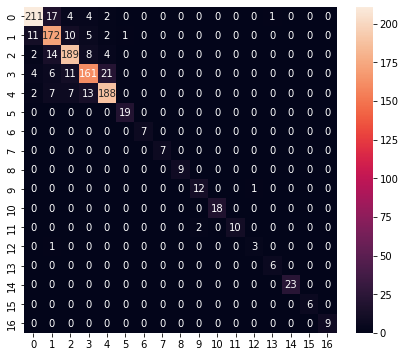

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       239
           1       0.79      0.86      0.82       201
           2       0.86      0.87      0.86       217
           3       0.84      0.79      0.82       203
           4       0.87      0.87      0.87       217
           5       0.95      1.00      0.97        19
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00         9
           9       0.86      0.92      0.89        13
          10       1.00      1.00      1.00        18
          11       1.00      0.83      0.91        12
          12       0.75      0.75      0.75         4
          13       0.86      1.00      0.92         6
          14       1.00      1.00      1.00        23
          15       1.00      1.00      1.00         6
          16       1.00      1.00      1.00         9

    

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)


In [15]:
# save as inference-only model
model.save(model_save_path, include_optimizer=False)

In [16]:
# transform the model (quantization)
tflite_save_path = 'model/keypoint_classifier/GRU.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops = [
  tf.lite.OpsSet.TFLITE_BUILTINS, # enable TensorFlow Lite ops.
  tf.lite.OpsSet.SELECT_TF_OPS # enable TensorFlow ops.
]

tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmp4as9a9h3\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmp4as9a9h3\assets


110272

# reasoning test

In [17]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [18]:
# get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [19]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [20]:
%%time
# perform inference
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 996 µs


In [21]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.13759525e-02 2.76026614e-02 5.70952147e-02 2.65218318e-01
 6.38689637e-01 2.12684739e-07 1.02408563e-07 6.57705527e-07
 1.18674159e-09 1.65529218e-06 4.98258181e-08 8.83955636e-07
 1.39745162e-05 7.25872784e-09 1.50260178e-07 1.07496207e-08
 3.59755546e-07]
4


# Some comparisons

In [22]:
import matplotlib.pyplot as plt

In [23]:
epoch_size = [100, 200, 400, 500, 800, 1000]
loss = []
accuracy = []

In [25]:
for i in epoch_size:
    model.fit(
        X_train,
        y_train,
        epochs=i,
        batch_size=128,
        validation_data=(X_test, y_test)
    )
    # model evaluation
    l, a = model.evaluate(X_test, y_test, batch_size=128)
    loss.append(l)
    accuracy.append(a)

Epoch 1/100
29/29 [==============================] - 1s 21ms/step - loss: 0.2440 - accuracy: 0.9008 - val_loss: 0.3789 - val_accuracy: 0.8851
Epoch 2/100
29/29 [==============================] - 1s 22ms/step - loss: 0.2383 - accuracy: 0.9061 - val_loss: 0.3768 - val_accuracy: 0.8851
Epoch 3/100
29/29 [==============================] - 1s 23ms/step - loss: 0.2500 - accuracy: 0.9036 - val_loss: 0.3894 - val_accuracy: 0.8793
Epoch 4/100
29/29 [==============================] - 1s 23ms/step - loss: 0.2779 - accuracy: 0.8912 - val_loss: 0.3787 - val_accuracy: 0.8810
Epoch 5/100
29/29 [==============================] - 1s 22ms/step - loss: 0.2619 - accuracy: 0.8917 - val_loss: 0.4003 - val_accuracy: 0.8760
Epoch 6/100
29/29 [==============================] - 1s 22ms/step - loss: 0.2442 - accuracy: 0.9030 - val_loss: 0.3734 - val_accuracy: 0.8843
Epoch 7/100
29/29 [==============================] - 1s 22ms/step - loss: 0.2501 - accuracy: 0.9058 - val_loss: 0.3924 - val_accuracy: 0.8884
Epoch 

Epoch 58/100
29/29 [==============================] - 1s 21ms/step - loss: 0.2342 - accuracy: 0.9121 - val_loss: 0.3751 - val_accuracy: 0.8868
Epoch 59/100
29/29 [==============================] - 1s 21ms/step - loss: 0.2245 - accuracy: 0.9121 - val_loss: 0.3778 - val_accuracy: 0.8893
Epoch 60/100
29/29 [==============================] - 1s 21ms/step - loss: 0.2249 - accuracy: 0.9113 - val_loss: 0.3919 - val_accuracy: 0.8818
Epoch 61/100
29/29 [==============================] - 1s 21ms/step - loss: 0.2292 - accuracy: 0.9124 - val_loss: 0.3986 - val_accuracy: 0.8727
Epoch 62/100
29/29 [==============================] - 1s 22ms/step - loss: 0.2320 - accuracy: 0.9052 - val_loss: 0.3771 - val_accuracy: 0.8843
Epoch 63/100
29/29 [==============================] - 1s 21ms/step - loss: 0.2302 - accuracy: 0.9083 - val_loss: 0.3814 - val_accuracy: 0.8884
Epoch 64/100
29/29 [==============================] - 1s 21ms/step - loss: 0.2336 - accuracy: 0.9102 - val_loss: 0.4001 - val_accuracy: 0.8785

Epoch 15/200
29/29 [==============================] - 1s 21ms/step - loss: 0.2054 - accuracy: 0.9201 - val_loss: 0.3777 - val_accuracy: 0.8967
Epoch 16/200
29/29 [==============================] - 1s 21ms/step - loss: 0.2043 - accuracy: 0.9207 - val_loss: 0.3971 - val_accuracy: 0.8860
Epoch 17/200
29/29 [==============================] - 1s 21ms/step - loss: 0.1996 - accuracy: 0.9215 - val_loss: 0.3704 - val_accuracy: 0.8950
Epoch 18/200
29/29 [==============================] - 1s 21ms/step - loss: 0.2019 - accuracy: 0.9218 - val_loss: 0.3932 - val_accuracy: 0.8843
Epoch 19/200
29/29 [==============================] - 1s 21ms/step - loss: 0.2025 - accuracy: 0.9229 - val_loss: 0.3963 - val_accuracy: 0.8917
Epoch 20/200
29/29 [==============================] - 1s 21ms/step - loss: 0.2043 - accuracy: 0.9127 - val_loss: 0.3730 - val_accuracy: 0.8950
Epoch 21/200
29/29 [==============================] - 1s 21ms/step - loss: 0.2096 - accuracy: 0.9207 - val_loss: 0.3814 - val_accuracy: 0.8926

29/29 [==============================] - 1s 22ms/step - loss: 0.1833 - accuracy: 0.9295 - val_loss: 0.3810 - val_accuracy: 0.8942
Epoch 72/200
29/29 [==============================] - 1s 22ms/step - loss: 0.1804 - accuracy: 0.9300 - val_loss: 0.3906 - val_accuracy: 0.8909
Epoch 73/200
29/29 [==============================] - 1s 22ms/step - loss: 0.1781 - accuracy: 0.9358 - val_loss: 0.3878 - val_accuracy: 0.8793
Epoch 74/200
29/29 [==============================] - 1s 21ms/step - loss: 0.1865 - accuracy: 0.9289 - val_loss: 0.3754 - val_accuracy: 0.8950
Epoch 75/200
29/29 [==============================] - 1s 22ms/step - loss: 0.1818 - accuracy: 0.9306 - val_loss: 0.3792 - val_accuracy: 0.8950
Epoch 76/200
29/29 [==============================] - 1s 21ms/step - loss: 0.1838 - accuracy: 0.9292 - val_loss: 0.3820 - val_accuracy: 0.8992
Epoch 77/200
29/29 [==============================] - 1s 22ms/step - loss: 0.1866 - accuracy: 0.9284 - val_loss: 0.3936 - val_accuracy: 0.8934
Epoch 78/200

29/29 [==============================] - 1s 22ms/step - loss: 0.1738 - accuracy: 0.9344 - val_loss: 0.3805 - val_accuracy: 0.9008
Epoch 129/200
29/29 [==============================] - 1s 22ms/step - loss: 0.1874 - accuracy: 0.9251 - val_loss: 0.3926 - val_accuracy: 0.8926
Epoch 130/200
29/29 [==============================] - 1s 19ms/step - loss: 0.1836 - accuracy: 0.9278 - val_loss: 0.3850 - val_accuracy: 0.8967
Epoch 131/200
29/29 [==============================] - 1s 20ms/step - loss: 0.1620 - accuracy: 0.9402 - val_loss: 0.3865 - val_accuracy: 0.8983
Epoch 132/200
29/29 [==============================] - 1s 21ms/step - loss: 0.1694 - accuracy: 0.9386 - val_loss: 0.3950 - val_accuracy: 0.8917
Epoch 133/200
29/29 [==============================] - 1s 19ms/step - loss: 0.1717 - accuracy: 0.9275 - val_loss: 0.4008 - val_accuracy: 0.8843
Epoch 134/200
29/29 [==============================] - 1s 21ms/step - loss: 0.1818 - accuracy: 0.9317 - val_loss: 0.3716 - val_accuracy: 0.9000
Epoch 

Epoch 185/200
29/29 [==============================] - 1s 21ms/step - loss: 0.1489 - accuracy: 0.9427 - val_loss: 0.3770 - val_accuracy: 0.8992
Epoch 186/200
29/29 [==============================] - 1s 22ms/step - loss: 0.1460 - accuracy: 0.9452 - val_loss: 0.3912 - val_accuracy: 0.9000
Epoch 187/200
29/29 [==============================] - 1s 21ms/step - loss: 0.1495 - accuracy: 0.9413 - val_loss: 0.3974 - val_accuracy: 0.8992
Epoch 188/200
29/29 [==============================] - 1s 21ms/step - loss: 0.1616 - accuracy: 0.9372 - val_loss: 0.3980 - val_accuracy: 0.8934
Epoch 189/200
29/29 [==============================] - 1s 23ms/step - loss: 0.1695 - accuracy: 0.9342 - val_loss: 0.4145 - val_accuracy: 0.8926
Epoch 190/200
29/29 [==============================] - 1s 22ms/step - loss: 0.1692 - accuracy: 0.9413 - val_loss: 0.3790 - val_accuracy: 0.9000
Epoch 191/200
29/29 [==============================] - 1s 21ms/step - loss: 0.1716 - accuracy: 0.9306 - val_loss: 0.3995 - val_accuracy:

29/29 [==============================] - 1s 22ms/step - loss: 0.1609 - accuracy: 0.9350 - val_loss: 0.3955 - val_accuracy: 0.9008
Epoch 42/400
29/29 [==============================] - 1s 21ms/step - loss: 0.1447 - accuracy: 0.9457 - val_loss: 0.3776 - val_accuracy: 0.9041
Epoch 43/400
29/29 [==============================] - 1s 22ms/step - loss: 0.1462 - accuracy: 0.9438 - val_loss: 0.3819 - val_accuracy: 0.8934
Epoch 44/400
29/29 [==============================] - 1s 21ms/step - loss: 0.1666 - accuracy: 0.9397 - val_loss: 0.3825 - val_accuracy: 0.9000
Epoch 45/400
29/29 [==============================] - 1s 20ms/step - loss: 0.1506 - accuracy: 0.9421 - val_loss: 0.3793 - val_accuracy: 0.9017
Epoch 46/400
29/29 [==============================] - 1s 22ms/step - loss: 0.1390 - accuracy: 0.9444 - val_loss: 0.3651 - val_accuracy: 0.9008
Epoch 47/400
29/29 [==============================] - 1s 21ms/step - loss: 0.1480 - accuracy: 0.9413 - val_loss: 0.3755 - val_accuracy: 0.9058
Epoch 48/400

29/29 [==============================] - 1s 21ms/step - loss: 0.1393 - accuracy: 0.9457 - val_loss: 0.3951 - val_accuracy: 0.9050
Epoch 99/400
29/29 [==============================] - 1s 21ms/step - loss: 0.1404 - accuracy: 0.9433 - val_loss: 0.3840 - val_accuracy: 0.9074
Epoch 100/400
29/29 [==============================] - 1s 21ms/step - loss: 0.1331 - accuracy: 0.9460 - val_loss: 0.3962 - val_accuracy: 0.9033
Epoch 101/400
29/29 [==============================] - 1s 22ms/step - loss: 0.1506 - accuracy: 0.9413 - val_loss: 0.3977 - val_accuracy: 0.9033
Epoch 102/400
29/29 [==============================] - 1s 21ms/step - loss: 0.1564 - accuracy: 0.9358 - val_loss: 0.4003 - val_accuracy: 0.8967
Epoch 103/400
29/29 [==============================] - 1s 21ms/step - loss: 0.1489 - accuracy: 0.9438 - val_loss: 0.4040 - val_accuracy: 0.8967
Epoch 104/400
29/29 [==============================] - 1s 21ms/step - loss: 0.1411 - accuracy: 0.9446 - val_loss: 0.3780 - val_accuracy: 0.9107
Epoch 1

29/29 [==============================] - 1s 22ms/step - loss: 0.1419 - accuracy: 0.9482 - val_loss: 0.4454 - val_accuracy: 0.8860
Epoch 155/400
29/29 [==============================] - 1s 22ms/step - loss: 0.1676 - accuracy: 0.9353 - val_loss: 0.4064 - val_accuracy: 0.9025
Epoch 156/400
29/29 [==============================] - 1s 22ms/step - loss: 0.1441 - accuracy: 0.9446 - val_loss: 0.3960 - val_accuracy: 0.9041
Epoch 157/400
29/29 [==============================] - 1s 21ms/step - loss: 0.1553 - accuracy: 0.9397 - val_loss: 0.3853 - val_accuracy: 0.9041
Epoch 158/400
29/29 [==============================] - 1s 21ms/step - loss: 0.1429 - accuracy: 0.9441 - val_loss: 0.3936 - val_accuracy: 0.9066
Epoch 159/400
29/29 [==============================] - 1s 22ms/step - loss: 0.1328 - accuracy: 0.9471 - val_loss: 0.3963 - val_accuracy: 0.9033
Epoch 160/400
29/29 [==============================] - 1s 21ms/step - loss: 0.1301 - accuracy: 0.9485 - val_loss: 0.4067 - val_accuracy: 0.9025
Epoch 

Epoch 211/400
29/29 [==============================] - 1s 21ms/step - loss: 0.1281 - accuracy: 0.9499 - val_loss: 0.4324 - val_accuracy: 0.8950
Epoch 212/400
29/29 [==============================] - 1s 18ms/step - loss: 0.1381 - accuracy: 0.9444 - val_loss: 0.3980 - val_accuracy: 0.9025
Epoch 213/400
29/29 [==============================] - 0s 17ms/step - loss: 0.1280 - accuracy: 0.9485 - val_loss: 0.3956 - val_accuracy: 0.9124
Epoch 214/400
29/29 [==============================] - 1s 20ms/step - loss: 0.1220 - accuracy: 0.9545 - val_loss: 0.4242 - val_accuracy: 0.9017
Epoch 215/400
29/29 [==============================] - 1s 18ms/step - loss: 0.1302 - accuracy: 0.9496 - val_loss: 0.4126 - val_accuracy: 0.9017
Epoch 216/400
29/29 [==============================] - 1s 21ms/step - loss: 0.1231 - accuracy: 0.9534 - val_loss: 0.3983 - val_accuracy: 0.9058
Epoch 217/400
29/29 [==============================] - 1s 21ms/step - loss: 0.1196 - accuracy: 0.9543 - val_loss: 0.3980 - val_accuracy:

Epoch 268/400
29/29 [==============================] - 1s 22ms/step - loss: 0.1215 - accuracy: 0.9551 - val_loss: 0.4178 - val_accuracy: 0.9025
Epoch 269/400
29/29 [==============================] - 1s 21ms/step - loss: 0.1416 - accuracy: 0.9515 - val_loss: 0.3896 - val_accuracy: 0.9157
Epoch 270/400
29/29 [==============================] - 1s 21ms/step - loss: 0.1187 - accuracy: 0.9543 - val_loss: 0.4103 - val_accuracy: 0.9058
Epoch 271/400
29/29 [==============================] - 1s 21ms/step - loss: 0.1161 - accuracy: 0.9545 - val_loss: 0.3929 - val_accuracy: 0.9099
Epoch 272/400
29/29 [==============================] - 1s 21ms/step - loss: 0.1238 - accuracy: 0.9523 - val_loss: 0.3914 - val_accuracy: 0.9149
Epoch 273/400
29/29 [==============================] - 1s 21ms/step - loss: 0.1277 - accuracy: 0.9490 - val_loss: 0.4061 - val_accuracy: 0.9025
Epoch 274/400
29/29 [==============================] - 1s 21ms/step - loss: 0.1165 - accuracy: 0.9537 - val_loss: 0.4112 - val_accuracy:

Epoch 325/400
29/29 [==============================] - 1s 21ms/step - loss: 0.1158 - accuracy: 0.9554 - val_loss: 0.4090 - val_accuracy: 0.9083
Epoch 326/400
29/29 [==============================] - 1s 22ms/step - loss: 0.1182 - accuracy: 0.9556 - val_loss: 0.4194 - val_accuracy: 0.9008
Epoch 327/400
29/29 [==============================] - 1s 21ms/step - loss: 0.1040 - accuracy: 0.9559 - val_loss: 0.4190 - val_accuracy: 0.9116
Epoch 328/400
29/29 [==============================] - 1s 21ms/step - loss: 0.1320 - accuracy: 0.9488 - val_loss: 0.4719 - val_accuracy: 0.8992
Epoch 329/400
29/29 [==============================] - 1s 22ms/step - loss: 0.1362 - accuracy: 0.9521 - val_loss: 0.3902 - val_accuracy: 0.9091
Epoch 330/400
29/29 [==============================] - 1s 22ms/step - loss: 0.1179 - accuracy: 0.9556 - val_loss: 0.4114 - val_accuracy: 0.9091
Epoch 331/400
29/29 [==============================] - 1s 22ms/step - loss: 0.1268 - accuracy: 0.9504 - val_loss: 0.4090 - val_accuracy:

29/29 [==============================] - 1s 22ms/step - loss: 0.1079 - accuracy: 0.9606 - val_loss: 0.4230 - val_accuracy: 0.9083
Epoch 382/400
29/29 [==============================] - 1s 22ms/step - loss: 0.1112 - accuracy: 0.9573 - val_loss: 0.4295 - val_accuracy: 0.9074
Epoch 383/400
29/29 [==============================] - 1s 22ms/step - loss: 0.0990 - accuracy: 0.9609 - val_loss: 0.4024 - val_accuracy: 0.9182
Epoch 384/400
29/29 [==============================] - 1s 21ms/step - loss: 0.1086 - accuracy: 0.9603 - val_loss: 0.4300 - val_accuracy: 0.9033
Epoch 385/400
29/29 [==============================] - 1s 19ms/step - loss: 0.1238 - accuracy: 0.9493 - val_loss: 0.4302 - val_accuracy: 0.9074
Epoch 386/400
29/29 [==============================] - 1s 17ms/step - loss: 0.1095 - accuracy: 0.9584 - val_loss: 0.4067 - val_accuracy: 0.9132
Epoch 387/400
29/29 [==============================] - 1s 19ms/step - loss: 0.1082 - accuracy: 0.9587 - val_loss: 0.3988 - val_accuracy: 0.9107
Epoch 

Epoch 38/500
29/29 [==============================] - 1s 22ms/step - loss: 0.1097 - accuracy: 0.9614 - val_loss: 0.4141 - val_accuracy: 0.9124
Epoch 39/500
29/29 [==============================] - 1s 22ms/step - loss: 0.0956 - accuracy: 0.9653 - val_loss: 0.4185 - val_accuracy: 0.9124
Epoch 40/500
29/29 [==============================] - 1s 23ms/step - loss: 0.0980 - accuracy: 0.9631 - val_loss: 0.4077 - val_accuracy: 0.9149
Epoch 41/500
29/29 [==============================] - 1s 22ms/step - loss: 0.1035 - accuracy: 0.9606 - val_loss: 0.4262 - val_accuracy: 0.9041
Epoch 42/500
29/29 [==============================] - 1s 21ms/step - loss: 0.1086 - accuracy: 0.9598 - val_loss: 0.4330 - val_accuracy: 0.9107
Epoch 43/500
29/29 [==============================] - 1s 22ms/step - loss: 0.1031 - accuracy: 0.9623 - val_loss: 0.4371 - val_accuracy: 0.8975
Epoch 44/500
29/29 [==============================] - 1s 22ms/step - loss: 0.1011 - accuracy: 0.9587 - val_loss: 0.4007 - val_accuracy: 0.9116

29/29 [==============================] - 1s 22ms/step - loss: 0.0858 - accuracy: 0.9683 - val_loss: 0.4100 - val_accuracy: 0.9140
Epoch 96/500
29/29 [==============================] - 1s 21ms/step - loss: 0.1037 - accuracy: 0.9592 - val_loss: 0.4219 - val_accuracy: 0.9157
Epoch 97/500
29/29 [==============================] - 1s 20ms/step - loss: 0.0833 - accuracy: 0.9667 - val_loss: 0.4023 - val_accuracy: 0.9140
Epoch 98/500
29/29 [==============================] - 1s 22ms/step - loss: 0.0985 - accuracy: 0.9614 - val_loss: 0.4081 - val_accuracy: 0.9132
Epoch 99/500
29/29 [==============================] - 1s 21ms/step - loss: 0.0944 - accuracy: 0.9658 - val_loss: 0.4153 - val_accuracy: 0.9107
Epoch 100/500
29/29 [==============================] - 1s 22ms/step - loss: 0.0981 - accuracy: 0.9617 - val_loss: 0.4154 - val_accuracy: 0.9157
Epoch 101/500
29/29 [==============================] - 1s 22ms/step - loss: 0.1059 - accuracy: 0.9603 - val_loss: 0.4233 - val_accuracy: 0.9107
Epoch 102/

29/29 [==============================] - 1s 22ms/step - loss: 0.0975 - accuracy: 0.9636 - val_loss: 0.3997 - val_accuracy: 0.9190
Epoch 153/500
29/29 [==============================] - 1s 22ms/step - loss: 0.0918 - accuracy: 0.9656 - val_loss: 0.4277 - val_accuracy: 0.9124
Epoch 154/500
29/29 [==============================] - 1s 22ms/step - loss: 0.0934 - accuracy: 0.9631 - val_loss: 0.4357 - val_accuracy: 0.9107
Epoch 155/500
29/29 [==============================] - 1s 21ms/step - loss: 0.0828 - accuracy: 0.9669 - val_loss: 0.4257 - val_accuracy: 0.9165
Epoch 156/500
29/29 [==============================] - 1s 22ms/step - loss: 0.0953 - accuracy: 0.9653 - val_loss: 0.4346 - val_accuracy: 0.9083
Epoch 157/500
29/29 [==============================] - 1s 21ms/step - loss: 0.1057 - accuracy: 0.9601 - val_loss: 0.4321 - val_accuracy: 0.9165
Epoch 158/500
29/29 [==============================] - 1s 21ms/step - loss: 0.0920 - accuracy: 0.9658 - val_loss: 0.4110 - val_accuracy: 0.9165
Epoch 

Epoch 209/500
29/29 [==============================] - 1s 21ms/step - loss: 0.0993 - accuracy: 0.9639 - val_loss: 0.4143 - val_accuracy: 0.9174
Epoch 210/500
29/29 [==============================] - 1s 20ms/step - loss: 0.0954 - accuracy: 0.9650 - val_loss: 0.4262 - val_accuracy: 0.9182
Epoch 211/500
29/29 [==============================] - 1s 21ms/step - loss: 0.0931 - accuracy: 0.9658 - val_loss: 0.4315 - val_accuracy: 0.9157
Epoch 212/500
29/29 [==============================] - 1s 21ms/step - loss: 0.0802 - accuracy: 0.9691 - val_loss: 0.4478 - val_accuracy: 0.9132
Epoch 213/500
29/29 [==============================] - 1s 21ms/step - loss: 0.0794 - accuracy: 0.9705 - val_loss: 0.4153 - val_accuracy: 0.9215
Epoch 214/500
29/29 [==============================] - 1s 21ms/step - loss: 0.0810 - accuracy: 0.9680 - val_loss: 0.4140 - val_accuracy: 0.9198
Epoch 215/500
29/29 [==============================] - 1s 21ms/step - loss: 0.0759 - accuracy: 0.9730 - val_loss: 0.4082 - val_accuracy:

Epoch 266/500
29/29 [==============================] - 1s 21ms/step - loss: 0.0801 - accuracy: 0.9661 - val_loss: 0.4124 - val_accuracy: 0.9190
Epoch 267/500
29/29 [==============================] - 1s 21ms/step - loss: 0.0805 - accuracy: 0.9686 - val_loss: 0.4336 - val_accuracy: 0.9149
Epoch 268/500
29/29 [==============================] - 1s 22ms/step - loss: 0.0801 - accuracy: 0.9700 - val_loss: 0.4210 - val_accuracy: 0.9174
Epoch 269/500
29/29 [==============================] - 1s 21ms/step - loss: 0.0771 - accuracy: 0.9669 - val_loss: 0.4202 - val_accuracy: 0.9165
Epoch 270/500
29/29 [==============================] - 1s 21ms/step - loss: 0.0925 - accuracy: 0.9680 - val_loss: 0.4103 - val_accuracy: 0.9198
Epoch 271/500
29/29 [==============================] - 1s 19ms/step - loss: 0.0938 - accuracy: 0.9656 - val_loss: 0.4331 - val_accuracy: 0.9182
Epoch 272/500
29/29 [==============================] - 1s 20ms/step - loss: 0.0886 - accuracy: 0.9664 - val_loss: 0.4363 - val_accuracy:

Epoch 323/500
29/29 [==============================] - 1s 22ms/step - loss: 0.0916 - accuracy: 0.9636 - val_loss: 0.4481 - val_accuracy: 0.9099
Epoch 324/500
29/29 [==============================] - 1s 21ms/step - loss: 0.0951 - accuracy: 0.9628 - val_loss: 0.4214 - val_accuracy: 0.9174
Epoch 325/500
29/29 [==============================] - 1s 22ms/step - loss: 0.0688 - accuracy: 0.9733 - val_loss: 0.4142 - val_accuracy: 0.9182
Epoch 326/500
29/29 [==============================] - 1s 22ms/step - loss: 0.0742 - accuracy: 0.9713 - val_loss: 0.4302 - val_accuracy: 0.9198
Epoch 327/500
29/29 [==============================] - 1s 23ms/step - loss: 0.0871 - accuracy: 0.9661 - val_loss: 0.4227 - val_accuracy: 0.9157
Epoch 328/500
29/29 [==============================] - 1s 22ms/step - loss: 0.0869 - accuracy: 0.9697 - val_loss: 0.4311 - val_accuracy: 0.9174
Epoch 329/500
29/29 [==============================] - 1s 22ms/step - loss: 0.0780 - accuracy: 0.9711 - val_loss: 0.4182 - val_accuracy:

Epoch 380/500
29/29 [==============================] - 1s 18ms/step - loss: 0.0865 - accuracy: 0.9647 - val_loss: 0.4290 - val_accuracy: 0.9174
Epoch 381/500
29/29 [==============================] - 1s 21ms/step - loss: 0.0810 - accuracy: 0.9686 - val_loss: 0.4383 - val_accuracy: 0.9132
Epoch 382/500
29/29 [==============================] - 1s 22ms/step - loss: 0.0790 - accuracy: 0.9716 - val_loss: 0.4348 - val_accuracy: 0.9182
Epoch 383/500
29/29 [==============================] - 1s 23ms/step - loss: 0.0865 - accuracy: 0.9667 - val_loss: 0.4333 - val_accuracy: 0.9165
Epoch 384/500
29/29 [==============================] - 1s 22ms/step - loss: 0.0757 - accuracy: 0.9716 - val_loss: 0.4200 - val_accuracy: 0.9207
Epoch 385/500
29/29 [==============================] - 1s 24ms/step - loss: 0.0902 - accuracy: 0.9672 - val_loss: 0.4293 - val_accuracy: 0.9149
Epoch 386/500
29/29 [==============================] - 1s 21ms/step - loss: 0.0833 - accuracy: 0.9689 - val_loss: 0.4420 - val_accuracy:

Epoch 437/500
29/29 [==============================] - 1s 20ms/step - loss: 0.0796 - accuracy: 0.9689 - val_loss: 0.4568 - val_accuracy: 0.9132
Epoch 438/500
29/29 [==============================] - 1s 22ms/step - loss: 0.0862 - accuracy: 0.9645 - val_loss: 0.4235 - val_accuracy: 0.9264
Epoch 439/500
29/29 [==============================] - 1s 21ms/step - loss: 0.0693 - accuracy: 0.9722 - val_loss: 0.4560 - val_accuracy: 0.9182
Epoch 440/500
29/29 [==============================] - 1s 22ms/step - loss: 0.0826 - accuracy: 0.9675 - val_loss: 0.4454 - val_accuracy: 0.9174
Epoch 441/500
29/29 [==============================] - 1s 22ms/step - loss: 0.0855 - accuracy: 0.9667 - val_loss: 0.4690 - val_accuracy: 0.9116
Epoch 442/500
29/29 [==============================] - 1s 22ms/step - loss: 0.0813 - accuracy: 0.9686 - val_loss: 0.4143 - val_accuracy: 0.9190
Epoch 443/500
29/29 [==============================] - 1s 21ms/step - loss: 0.0785 - accuracy: 0.9691 - val_loss: 0.4445 - val_accuracy:

Epoch 494/500
29/29 [==============================] - 1s 21ms/step - loss: 0.0769 - accuracy: 0.9713 - val_loss: 0.4365 - val_accuracy: 0.9174
Epoch 495/500
29/29 [==============================] - 1s 21ms/step - loss: 0.0771 - accuracy: 0.9713 - val_loss: 0.4283 - val_accuracy: 0.9207
Epoch 496/500
29/29 [==============================] - 1s 22ms/step - loss: 0.0750 - accuracy: 0.9725 - val_loss: 0.4234 - val_accuracy: 0.9207
Epoch 497/500
29/29 [==============================] - 1s 22ms/step - loss: 0.0682 - accuracy: 0.9744 - val_loss: 0.4326 - val_accuracy: 0.9248
Epoch 498/500
29/29 [==============================] - 1s 22ms/step - loss: 0.0831 - accuracy: 0.9691 - val_loss: 0.4460 - val_accuracy: 0.9157
Epoch 499/500
29/29 [==============================] - 1s 21ms/step - loss: 0.0703 - accuracy: 0.9733 - val_loss: 0.4277 - val_accuracy: 0.9223
Epoch 500/500
10/10 [==============================] - 0s 7ms/step - loss: 0.4319 - accuracy: 0.9223
Epoch 1/800
29/29 [================

29/29 [==============================] - 1s 22ms/step - loss: 0.0763 - accuracy: 0.9705 - val_loss: 0.4478 - val_accuracy: 0.9157
Epoch 51/800
29/29 [==============================] - 1s 18ms/step - loss: 0.0691 - accuracy: 0.9730 - val_loss: 0.4248 - val_accuracy: 0.9174
Epoch 52/800
29/29 [==============================] - 1s 22ms/step - loss: 0.0772 - accuracy: 0.9700 - val_loss: 0.4827 - val_accuracy: 0.9025
Epoch 53/800
29/29 [==============================] - 1s 23ms/step - loss: 0.1135 - accuracy: 0.9579 - val_loss: 0.4680 - val_accuracy: 0.9074
Epoch 54/800
29/29 [==============================] - 1s 21ms/step - loss: 0.1177 - accuracy: 0.9625 - val_loss: 0.4769 - val_accuracy: 0.9008
Epoch 55/800
29/29 [==============================] - 1s 22ms/step - loss: 0.0866 - accuracy: 0.9686 - val_loss: 0.4454 - val_accuracy: 0.9182
Epoch 56/800
29/29 [==============================] - 1s 22ms/step - loss: 0.0692 - accuracy: 0.9744 - val_loss: 0.4138 - val_accuracy: 0.9264
Epoch 57/800

29/29 [==============================] - 1s 20ms/step - loss: 0.0642 - accuracy: 0.9771 - val_loss: 0.4482 - val_accuracy: 0.9198
Epoch 108/800
29/29 [==============================] - 1s 21ms/step - loss: 0.0690 - accuracy: 0.9738 - val_loss: 0.4453 - val_accuracy: 0.9190
Epoch 109/800
29/29 [==============================] - 1s 21ms/step - loss: 0.0615 - accuracy: 0.9793 - val_loss: 0.4438 - val_accuracy: 0.9215
Epoch 110/800
29/29 [==============================] - 1s 21ms/step - loss: 0.0743 - accuracy: 0.9725 - val_loss: 0.4701 - val_accuracy: 0.9132
Epoch 111/800
29/29 [==============================] - 1s 22ms/step - loss: 0.0643 - accuracy: 0.9744 - val_loss: 0.4486 - val_accuracy: 0.9198
Epoch 112/800
29/29 [==============================] - 1s 21ms/step - loss: 0.0738 - accuracy: 0.9725 - val_loss: 0.4608 - val_accuracy: 0.9174
Epoch 113/800
29/29 [==============================] - 1s 22ms/step - loss: 0.0806 - accuracy: 0.9711 - val_loss: 0.4742 - val_accuracy: 0.9157
Epoch 

Epoch 164/800
29/29 [==============================] - 1s 22ms/step - loss: 0.0649 - accuracy: 0.9774 - val_loss: 0.4587 - val_accuracy: 0.9190
Epoch 165/800
29/29 [==============================] - 1s 22ms/step - loss: 0.0591 - accuracy: 0.9782 - val_loss: 0.4576 - val_accuracy: 0.9149
Epoch 166/800
29/29 [==============================] - 1s 20ms/step - loss: 0.0522 - accuracy: 0.9826 - val_loss: 0.4518 - val_accuracy: 0.9223
Epoch 167/800
29/29 [==============================] - 1s 21ms/step - loss: 0.0634 - accuracy: 0.9744 - val_loss: 0.4470 - val_accuracy: 0.9190
Epoch 168/800
29/29 [==============================] - 1s 21ms/step - loss: 0.0669 - accuracy: 0.9760 - val_loss: 0.4672 - val_accuracy: 0.9182
Epoch 169/800
29/29 [==============================] - 1s 21ms/step - loss: 0.0689 - accuracy: 0.9758 - val_loss: 0.4529 - val_accuracy: 0.9198
Epoch 170/800
29/29 [==============================] - 1s 21ms/step - loss: 0.0679 - accuracy: 0.9744 - val_loss: 0.4501 - val_accuracy:

Epoch 221/800
29/29 [==============================] - 1s 19ms/step - loss: 0.0658 - accuracy: 0.9755 - val_loss: 0.4659 - val_accuracy: 0.9157
Epoch 222/800
29/29 [==============================] - 1s 18ms/step - loss: 0.0636 - accuracy: 0.9771 - val_loss: 0.4669 - val_accuracy: 0.9174
Epoch 223/800
29/29 [==============================] - 1s 18ms/step - loss: 0.0514 - accuracy: 0.9777 - val_loss: 0.4526 - val_accuracy: 0.9223
Epoch 224/800
29/29 [==============================] - 1s 20ms/step - loss: 0.0537 - accuracy: 0.9802 - val_loss: 0.4539 - val_accuracy: 0.9182
Epoch 225/800
29/29 [==============================] - 1s 18ms/step - loss: 0.0692 - accuracy: 0.9733 - val_loss: 0.4665 - val_accuracy: 0.9182
Epoch 226/800
29/29 [==============================] - 1s 19ms/step - loss: 0.0605 - accuracy: 0.9758 - val_loss: 0.4625 - val_accuracy: 0.9215
Epoch 227/800
29/29 [==============================] - 1s 21ms/step - loss: 0.0662 - accuracy: 0.9758 - val_loss: 0.4606 - val_accuracy:

29/29 [==============================] - 1s 21ms/step - loss: 0.0559 - accuracy: 0.9799 - val_loss: 0.4347 - val_accuracy: 0.9256
Epoch 278/800
29/29 [==============================] - 1s 21ms/step - loss: 0.0634 - accuracy: 0.9749 - val_loss: 0.4448 - val_accuracy: 0.9198
Epoch 279/800
29/29 [==============================] - 1s 22ms/step - loss: 0.0685 - accuracy: 0.9736 - val_loss: 0.4520 - val_accuracy: 0.9198
Epoch 280/800
29/29 [==============================] - 1s 22ms/step - loss: 0.0725 - accuracy: 0.9708 - val_loss: 0.4542 - val_accuracy: 0.9215
Epoch 281/800
29/29 [==============================] - 1s 21ms/step - loss: 0.0637 - accuracy: 0.9774 - val_loss: 0.4525 - val_accuracy: 0.9157
Epoch 282/800
29/29 [==============================] - 1s 22ms/step - loss: 0.0533 - accuracy: 0.9802 - val_loss: 0.4257 - val_accuracy: 0.9215
Epoch 283/800
29/29 [==============================] - 1s 21ms/step - loss: 0.0660 - accuracy: 0.9763 - val_loss: 0.4418 - val_accuracy: 0.9157
Epoch 

Epoch 334/800
29/29 [==============================] - 1s 22ms/step - loss: 0.0485 - accuracy: 0.9846 - val_loss: 0.4589 - val_accuracy: 0.9174
Epoch 335/800
29/29 [==============================] - 1s 21ms/step - loss: 0.0597 - accuracy: 0.9807 - val_loss: 0.4569 - val_accuracy: 0.9140
Epoch 336/800
29/29 [==============================] - 1s 21ms/step - loss: 0.0642 - accuracy: 0.9747 - val_loss: 0.4490 - val_accuracy: 0.9273
Epoch 337/800
29/29 [==============================] - 1s 21ms/step - loss: 0.0592 - accuracy: 0.9760 - val_loss: 0.4658 - val_accuracy: 0.9149
Epoch 338/800
29/29 [==============================] - 1s 22ms/step - loss: 0.0617 - accuracy: 0.9780 - val_loss: 0.4378 - val_accuracy: 0.9190
Epoch 339/800
29/29 [==============================] - 1s 21ms/step - loss: 0.0572 - accuracy: 0.9793 - val_loss: 0.4656 - val_accuracy: 0.9182
Epoch 340/800
29/29 [==============================] - 1s 21ms/step - loss: 0.0653 - accuracy: 0.9744 - val_loss: 0.4859 - val_accuracy:

Epoch 391/800
29/29 [==============================] - 1s 22ms/step - loss: 0.0640 - accuracy: 0.9752 - val_loss: 0.4383 - val_accuracy: 0.9248
Epoch 392/800
29/29 [==============================] - 1s 21ms/step - loss: 0.0787 - accuracy: 0.9727 - val_loss: 0.4508 - val_accuracy: 0.9223
Epoch 393/800
29/29 [==============================] - 1s 20ms/step - loss: 0.0871 - accuracy: 0.9667 - val_loss: 0.4444 - val_accuracy: 0.9207
Epoch 394/800
29/29 [==============================] - 1s 21ms/step - loss: 0.0710 - accuracy: 0.9736 - val_loss: 0.4439 - val_accuracy: 0.9190
Epoch 395/800
29/29 [==============================] - 1s 22ms/step - loss: 0.0557 - accuracy: 0.9774 - val_loss: 0.4283 - val_accuracy: 0.9281
Epoch 396/800
29/29 [==============================] - 1s 22ms/step - loss: 0.0486 - accuracy: 0.9843 - val_loss: 0.4898 - val_accuracy: 0.9174
Epoch 397/800
29/29 [==============================] - 1s 23ms/step - loss: 0.0597 - accuracy: 0.9818 - val_loss: 0.4513 - val_accuracy:

Epoch 448/800
29/29 [==============================] - 1s 21ms/step - loss: 0.0683 - accuracy: 0.9738 - val_loss: 0.4469 - val_accuracy: 0.9207
Epoch 449/800
29/29 [==============================] - 1s 23ms/step - loss: 0.0547 - accuracy: 0.9785 - val_loss: 0.4537 - val_accuracy: 0.9248
Epoch 450/800
29/29 [==============================] - 1s 21ms/step - loss: 0.0488 - accuracy: 0.9807 - val_loss: 0.4326 - val_accuracy: 0.9298
Epoch 451/800
29/29 [==============================] - 1s 21ms/step - loss: 0.0530 - accuracy: 0.9788 - val_loss: 0.4397 - val_accuracy: 0.9264
Epoch 452/800
29/29 [==============================] - 1s 21ms/step - loss: 0.0538 - accuracy: 0.9804 - val_loss: 0.4435 - val_accuracy: 0.9223
Epoch 453/800
29/29 [==============================] - 1s 21ms/step - loss: 0.0553 - accuracy: 0.9766 - val_loss: 0.4619 - val_accuracy: 0.9240
Epoch 454/800
29/29 [==============================] - 1s 22ms/step - loss: 0.0533 - accuracy: 0.9802 - val_loss: 0.4676 - val_accuracy:

29/29 [==============================] - 1s 18ms/step - loss: 0.0804 - accuracy: 0.9708 - val_loss: 0.5187 - val_accuracy: 0.9041
Epoch 505/800
29/29 [==============================] - 1s 20ms/step - loss: 0.0903 - accuracy: 0.9683 - val_loss: 0.4468 - val_accuracy: 0.9165
Epoch 506/800
29/29 [==============================] - 1s 19ms/step - loss: 0.0731 - accuracy: 0.9736 - val_loss: 0.4681 - val_accuracy: 0.9165
Epoch 507/800
29/29 [==============================] - 1s 20ms/step - loss: 0.0656 - accuracy: 0.9769 - val_loss: 0.4794 - val_accuracy: 0.9091
Epoch 508/800
29/29 [==============================] - 0s 17ms/step - loss: 0.0696 - accuracy: 0.9760 - val_loss: 0.4649 - val_accuracy: 0.9174
Epoch 509/800
29/29 [==============================] - 0s 17ms/step - loss: 0.0455 - accuracy: 0.9804 - val_loss: 0.4394 - val_accuracy: 0.9231
Epoch 510/800
29/29 [==============================] - 1s 18ms/step - loss: 0.0597 - accuracy: 0.9780 - val_loss: 0.4199 - val_accuracy: 0.9289
Epoch 

Epoch 561/800
29/29 [==============================] - 1s 21ms/step - loss: 0.0501 - accuracy: 0.9804 - val_loss: 0.4505 - val_accuracy: 0.9215
Epoch 562/800
29/29 [==============================] - 1s 22ms/step - loss: 0.0584 - accuracy: 0.9818 - val_loss: 0.4727 - val_accuracy: 0.9165
Epoch 563/800
29/29 [==============================] - 1s 22ms/step - loss: 0.0689 - accuracy: 0.9760 - val_loss: 0.4735 - val_accuracy: 0.9174
Epoch 564/800
29/29 [==============================] - 1s 22ms/step - loss: 0.0853 - accuracy: 0.9680 - val_loss: 0.4480 - val_accuracy: 0.9231
Epoch 565/800
29/29 [==============================] - 1s 21ms/step - loss: 0.0548 - accuracy: 0.9752 - val_loss: 0.4645 - val_accuracy: 0.9190
Epoch 566/800
29/29 [==============================] - 1s 21ms/step - loss: 0.0431 - accuracy: 0.9832 - val_loss: 0.4632 - val_accuracy: 0.9132
Epoch 567/800
29/29 [==============================] - 1s 20ms/step - loss: 0.0547 - accuracy: 0.9818 - val_loss: 0.4667 - val_accuracy:

29/29 [==============================] - 1s 21ms/step - loss: 0.0627 - accuracy: 0.9760 - val_loss: 0.4700 - val_accuracy: 0.9207
Epoch 618/800
29/29 [==============================] - 1s 20ms/step - loss: 0.0532 - accuracy: 0.9815 - val_loss: 0.4383 - val_accuracy: 0.9248
Epoch 619/800
29/29 [==============================] - 1s 22ms/step - loss: 0.0537 - accuracy: 0.9818 - val_loss: 0.4736 - val_accuracy: 0.9190
Epoch 620/800
29/29 [==============================] - 1s 21ms/step - loss: 0.0437 - accuracy: 0.9840 - val_loss: 0.4540 - val_accuracy: 0.9240
Epoch 621/800
29/29 [==============================] - 1s 21ms/step - loss: 0.0542 - accuracy: 0.9766 - val_loss: 0.4758 - val_accuracy: 0.9174
Epoch 622/800
29/29 [==============================] - 1s 24ms/step - loss: 0.0630 - accuracy: 0.9766 - val_loss: 0.4552 - val_accuracy: 0.9231
Epoch 623/800
29/29 [==============================] - 1s 22ms/step - loss: 0.0494 - accuracy: 0.9843 - val_loss: 0.4600 - val_accuracy: 0.9157
Epoch 

Epoch 674/800
29/29 [==============================] - 1s 21ms/step - loss: 0.0576 - accuracy: 0.9749 - val_loss: 0.4829 - val_accuracy: 0.9198
Epoch 675/800
29/29 [==============================] - 1s 21ms/step - loss: 0.0634 - accuracy: 0.9744 - val_loss: 0.4656 - val_accuracy: 0.9215
Epoch 676/800
29/29 [==============================] - 1s 20ms/step - loss: 0.0573 - accuracy: 0.9807 - val_loss: 0.4770 - val_accuracy: 0.9174
Epoch 677/800
29/29 [==============================] - 1s 21ms/step - loss: 0.0449 - accuracy: 0.9826 - val_loss: 0.4660 - val_accuracy: 0.9207
Epoch 678/800
29/29 [==============================] - 1s 21ms/step - loss: 0.0468 - accuracy: 0.9824 - val_loss: 0.4758 - val_accuracy: 0.9231
Epoch 679/800
29/29 [==============================] - 1s 21ms/step - loss: 0.0528 - accuracy: 0.9796 - val_loss: 0.4827 - val_accuracy: 0.9256
Epoch 680/800
29/29 [==============================] - 1s 20ms/step - loss: 0.0603 - accuracy: 0.9771 - val_loss: 0.4790 - val_accuracy:

29/29 [==============================] - 1s 21ms/step - loss: 0.0403 - accuracy: 0.9848 - val_loss: 0.4653 - val_accuracy: 0.9182
Epoch 731/800
29/29 [==============================] - 1s 21ms/step - loss: 0.0502 - accuracy: 0.9848 - val_loss: 0.4753 - val_accuracy: 0.9190
Epoch 732/800
29/29 [==============================] - 1s 21ms/step - loss: 0.0485 - accuracy: 0.9824 - val_loss: 0.4912 - val_accuracy: 0.9124
Epoch 733/800
29/29 [==============================] - 1s 22ms/step - loss: 0.0617 - accuracy: 0.9774 - val_loss: 0.4457 - val_accuracy: 0.9264
Epoch 734/800
29/29 [==============================] - 1s 22ms/step - loss: 0.0678 - accuracy: 0.9752 - val_loss: 0.4540 - val_accuracy: 0.9256
Epoch 735/800
29/29 [==============================] - 1s 22ms/step - loss: 0.0489 - accuracy: 0.9802 - val_loss: 0.4540 - val_accuracy: 0.9248
Epoch 736/800
29/29 [==============================] - 1s 21ms/step - loss: 0.0441 - accuracy: 0.9854 - val_loss: 0.4824 - val_accuracy: 0.9140
Epoch 

Epoch 787/800
29/29 [==============================] - 1s 21ms/step - loss: 0.0484 - accuracy: 0.9835 - val_loss: 0.4778 - val_accuracy: 0.9182
Epoch 788/800
29/29 [==============================] - 1s 21ms/step - loss: 0.0558 - accuracy: 0.9788 - val_loss: 0.4948 - val_accuracy: 0.9182
Epoch 789/800
29/29 [==============================] - 1s 21ms/step - loss: 0.0516 - accuracy: 0.9796 - val_loss: 0.4627 - val_accuracy: 0.9215
Epoch 790/800
29/29 [==============================] - 1s 21ms/step - loss: 0.0589 - accuracy: 0.9791 - val_loss: 0.4619 - val_accuracy: 0.9264
Epoch 791/800
29/29 [==============================] - 1s 21ms/step - loss: 0.0549 - accuracy: 0.9774 - val_loss: 0.4580 - val_accuracy: 0.9215
Epoch 792/800
29/29 [==============================] - 1s 20ms/step - loss: 0.0443 - accuracy: 0.9832 - val_loss: 0.4578 - val_accuracy: 0.9174
Epoch 793/800
29/29 [==============================] - 1s 21ms/step - loss: 0.0422 - accuracy: 0.9860 - val_loss: 0.4638 - val_accuracy:

29/29 [==============================] - 1s 21ms/step - loss: 0.0490 - accuracy: 0.9835 - val_loss: 0.4842 - val_accuracy: 0.9190
Epoch 44/1000
29/29 [==============================] - 1s 21ms/step - loss: 0.0580 - accuracy: 0.9777 - val_loss: 0.4743 - val_accuracy: 0.9182
Epoch 45/1000
29/29 [==============================] - 1s 22ms/step - loss: 0.0500 - accuracy: 0.9815 - val_loss: 0.4932 - val_accuracy: 0.9240
Epoch 46/1000
29/29 [==============================] - 1s 21ms/step - loss: 0.0481 - accuracy: 0.9815 - val_loss: 0.4569 - val_accuracy: 0.9273
Epoch 47/1000
29/29 [==============================] - 1s 21ms/step - loss: 0.0413 - accuracy: 0.9846 - val_loss: 0.4898 - val_accuracy: 0.9223
Epoch 48/1000
29/29 [==============================] - 1s 22ms/step - loss: 0.0474 - accuracy: 0.9804 - val_loss: 0.4907 - val_accuracy: 0.9174
Epoch 49/1000
29/29 [==============================] - 1s 22ms/step - loss: 0.0553 - accuracy: 0.9810 - val_loss: 0.4751 - val_accuracy: 0.9207
Epoch 

Epoch 100/1000
29/29 [==============================] - 1s 21ms/step - loss: 0.0577 - accuracy: 0.9802 - val_loss: 0.4664 - val_accuracy: 0.9207
Epoch 101/1000
29/29 [==============================] - 1s 21ms/step - loss: 0.0543 - accuracy: 0.9766 - val_loss: 0.4471 - val_accuracy: 0.9248
Epoch 102/1000
29/29 [==============================] - 1s 21ms/step - loss: 0.0538 - accuracy: 0.9804 - val_loss: 0.4495 - val_accuracy: 0.9248
Epoch 103/1000
29/29 [==============================] - 1s 21ms/step - loss: 0.0539 - accuracy: 0.9785 - val_loss: 0.4405 - val_accuracy: 0.9248
Epoch 104/1000
29/29 [==============================] - 1s 21ms/step - loss: 0.0571 - accuracy: 0.9780 - val_loss: 0.4887 - val_accuracy: 0.9165
Epoch 105/1000
29/29 [==============================] - 1s 21ms/step - loss: 0.0502 - accuracy: 0.9815 - val_loss: 0.4710 - val_accuracy: 0.9174
Epoch 106/1000
29/29 [==============================] - ETA: 0s - loss: 0.0560 - accuracy: 0.98 - 1s 22ms/step - loss: 0.0557 - ac

29/29 [==============================] - 1s 21ms/step - loss: 0.0418 - accuracy: 0.9851 - val_loss: 0.4787 - val_accuracy: 0.9264
Epoch 157/1000
29/29 [==============================] - 1s 23ms/step - loss: 0.0435 - accuracy: 0.9832 - val_loss: 0.5358 - val_accuracy: 0.9058
Epoch 158/1000
29/29 [==============================] - 1s 21ms/step - loss: 0.0657 - accuracy: 0.9785 - val_loss: 0.4857 - val_accuracy: 0.9248
Epoch 159/1000
29/29 [==============================] - 1s 22ms/step - loss: 0.0451 - accuracy: 0.9835 - val_loss: 0.4848 - val_accuracy: 0.9215
Epoch 160/1000
29/29 [==============================] - 1s 19ms/step - loss: 0.0543 - accuracy: 0.9769 - val_loss: 0.4977 - val_accuracy: 0.9223
Epoch 161/1000
29/29 [==============================] - 1s 21ms/step - loss: 0.0462 - accuracy: 0.9804 - val_loss: 0.5034 - val_accuracy: 0.9149
Epoch 162/1000
29/29 [==============================] - 1s 21ms/step - loss: 0.0536 - accuracy: 0.9771 - val_loss: 0.4889 - val_accuracy: 0.9215


29/29 [==============================] - 1s 23ms/step - loss: 0.0432 - accuracy: 0.9846 - val_loss: 0.4696 - val_accuracy: 0.9215
Epoch 213/1000
29/29 [==============================] - 1s 22ms/step - loss: 0.0446 - accuracy: 0.9835 - val_loss: 0.4819 - val_accuracy: 0.9207
Epoch 214/1000
29/29 [==============================] - 1s 23ms/step - loss: 0.0488 - accuracy: 0.9815 - val_loss: 0.4523 - val_accuracy: 0.9306
Epoch 215/1000
29/29 [==============================] - 1s 23ms/step - loss: 0.0439 - accuracy: 0.9824 - val_loss: 0.4677 - val_accuracy: 0.9223
Epoch 216/1000
29/29 [==============================] - 1s 23ms/step - loss: 0.0442 - accuracy: 0.9810 - val_loss: 0.4673 - val_accuracy: 0.9223
Epoch 217/1000
29/29 [==============================] - 1s 23ms/step - loss: 0.0429 - accuracy: 0.9840 - val_loss: 0.4756 - val_accuracy: 0.9231
Epoch 218/1000
29/29 [==============================] - 1s 22ms/step - loss: 0.0399 - accuracy: 0.9840 - val_loss: 0.5012 - val_accuracy: 0.9132


29/29 [==============================] - 1s 20ms/step - loss: 0.0525 - accuracy: 0.9799 - val_loss: 0.5000 - val_accuracy: 0.9174
Epoch 269/1000
29/29 [==============================] - 1s 21ms/step - loss: 0.0587 - accuracy: 0.9777 - val_loss: 0.4998 - val_accuracy: 0.9182
Epoch 270/1000
29/29 [==============================] - 1s 20ms/step - loss: 0.0607 - accuracy: 0.9780 - val_loss: 0.4674 - val_accuracy: 0.9198
Epoch 271/1000
29/29 [==============================] - 1s 20ms/step - loss: 0.0561 - accuracy: 0.9785 - val_loss: 0.4925 - val_accuracy: 0.9190
Epoch 272/1000
29/29 [==============================] - 1s 18ms/step - loss: 0.0374 - accuracy: 0.9871 - val_loss: 0.4830 - val_accuracy: 0.9190
Epoch 273/1000
29/29 [==============================] - 1s 18ms/step - loss: 0.0417 - accuracy: 0.9851 - val_loss: 0.4958 - val_accuracy: 0.9116
Epoch 274/1000
29/29 [==============================] - 1s 21ms/step - loss: 0.0468 - accuracy: 0.9843 - val_loss: 0.4919 - val_accuracy: 0.9157


29/29 [==============================] - 1s 23ms/step - loss: 0.0530 - accuracy: 0.9824 - val_loss: 0.4724 - val_accuracy: 0.9231
Epoch 325/1000
29/29 [==============================] - 1s 21ms/step - loss: 0.0627 - accuracy: 0.9785 - val_loss: 0.4692 - val_accuracy: 0.9231
Epoch 326/1000
29/29 [==============================] - 1s 22ms/step - loss: 0.0754 - accuracy: 0.9755 - val_loss: 0.4817 - val_accuracy: 0.9174
Epoch 327/1000
29/29 [==============================] - 1s 21ms/step - loss: 0.0502 - accuracy: 0.9824 - val_loss: 0.4590 - val_accuracy: 0.9231
Epoch 328/1000
29/29 [==============================] - 1s 22ms/step - loss: 0.0406 - accuracy: 0.9871 - val_loss: 0.4812 - val_accuracy: 0.9215
Epoch 329/1000
29/29 [==============================] - 1s 21ms/step - loss: 0.0458 - accuracy: 0.9829 - val_loss: 0.4597 - val_accuracy: 0.9207
Epoch 330/1000
29/29 [==============================] - 1s 22ms/step - loss: 0.0542 - accuracy: 0.9815 - val_loss: 0.4781 - val_accuracy: 0.9132


29/29 [==============================] - 1s 21ms/step - loss: 0.0360 - accuracy: 0.9879 - val_loss: 0.4500 - val_accuracy: 0.9281
Epoch 381/1000
29/29 [==============================] - 1s 25ms/step - loss: 0.0305 - accuracy: 0.9884 - val_loss: 0.4760 - val_accuracy: 0.9240
Epoch 382/1000
29/29 [==============================] - 1s 20ms/step - loss: 0.0388 - accuracy: 0.9862 - val_loss: 0.4806 - val_accuracy: 0.9190
Epoch 383/1000
29/29 [==============================] - 1s 22ms/step - loss: 0.0374 - accuracy: 0.9865 - val_loss: 0.4618 - val_accuracy: 0.9256
Epoch 384/1000
29/29 [==============================] - 1s 21ms/step - loss: 0.0459 - accuracy: 0.9865 - val_loss: 0.4680 - val_accuracy: 0.9215
Epoch 385/1000
29/29 [==============================] - 1s 21ms/step - loss: 0.0370 - accuracy: 0.9851 - val_loss: 0.4706 - val_accuracy: 0.9231
Epoch 386/1000
29/29 [==============================] - 1s 25ms/step - loss: 0.0708 - accuracy: 0.9760 - val_loss: 0.5308 - val_accuracy: 0.9116


29/29 [==============================] - 1s 21ms/step - loss: 0.0340 - accuracy: 0.9871 - val_loss: 0.4643 - val_accuracy: 0.9215
Epoch 437/1000
29/29 [==============================] - 1s 21ms/step - loss: 0.0375 - accuracy: 0.9876 - val_loss: 0.4568 - val_accuracy: 0.9264
Epoch 438/1000
29/29 [==============================] - 1s 21ms/step - loss: 0.0345 - accuracy: 0.9865 - val_loss: 0.4571 - val_accuracy: 0.9207
Epoch 439/1000
29/29 [==============================] - 1s 21ms/step - loss: 0.0444 - accuracy: 0.9824 - val_loss: 0.4685 - val_accuracy: 0.9165
Epoch 440/1000
29/29 [==============================] - 1s 21ms/step - loss: 0.0337 - accuracy: 0.9868 - val_loss: 0.4660 - val_accuracy: 0.9264
Epoch 441/1000
29/29 [==============================] - 1s 21ms/step - loss: 0.0326 - accuracy: 0.9887 - val_loss: 0.4624 - val_accuracy: 0.9256
Epoch 442/1000
29/29 [==============================] - 1s 21ms/step - loss: 0.0342 - accuracy: 0.9887 - val_loss: 0.5043 - val_accuracy: 0.9207


29/29 [==============================] - 1s 21ms/step - loss: 0.0517 - accuracy: 0.9826 - val_loss: 0.4694 - val_accuracy: 0.9248
Epoch 493/1000
29/29 [==============================] - 1s 22ms/step - loss: 0.0401 - accuracy: 0.9846 - val_loss: 0.4678 - val_accuracy: 0.9215
Epoch 494/1000
29/29 [==============================] - 1s 21ms/step - loss: 0.0341 - accuracy: 0.9882 - val_loss: 0.4671 - val_accuracy: 0.9306
Epoch 495/1000
29/29 [==============================] - 1s 25ms/step - loss: 0.0444 - accuracy: 0.9848 - val_loss: 0.4641 - val_accuracy: 0.9256
Epoch 496/1000
29/29 [==============================] - 1s 21ms/step - loss: 0.0369 - accuracy: 0.9854 - val_loss: 0.4699 - val_accuracy: 0.9207
Epoch 497/1000
29/29 [==============================] - 1s 20ms/step - loss: 0.0401 - accuracy: 0.9860 - val_loss: 0.4592 - val_accuracy: 0.9190
Epoch 498/1000
29/29 [==============================] - 1s 19ms/step - loss: 0.0414 - accuracy: 0.9843 - val_loss: 0.4851 - val_accuracy: 0.9231


29/29 [==============================] - 1s 21ms/step - loss: 0.0418 - accuracy: 0.9860 - val_loss: 0.4965 - val_accuracy: 0.9198
Epoch 549/1000
29/29 [==============================] - 1s 21ms/step - loss: 0.0391 - accuracy: 0.9868 - val_loss: 0.4730 - val_accuracy: 0.9240
Epoch 550/1000
29/29 [==============================] - 1s 21ms/step - loss: 0.0428 - accuracy: 0.9857 - val_loss: 0.4782 - val_accuracy: 0.9248
Epoch 551/1000
29/29 [==============================] - 1s 21ms/step - loss: 0.0463 - accuracy: 0.9840 - val_loss: 0.4949 - val_accuracy: 0.9198
Epoch 552/1000
29/29 [==============================] - 1s 21ms/step - loss: 0.0707 - accuracy: 0.9769 - val_loss: 0.5259 - val_accuracy: 0.9091
Epoch 553/1000
29/29 [==============================] - 1s 21ms/step - loss: 0.0505 - accuracy: 0.9804 - val_loss: 0.4686 - val_accuracy: 0.9182
Epoch 554/1000
29/29 [==============================] - 1s 21ms/step - loss: 0.0464 - accuracy: 0.9837 - val_loss: 0.4770 - val_accuracy: 0.9240


29/29 [==============================] - 1s 24ms/step - loss: 0.0477 - accuracy: 0.9826 - val_loss: 0.5255 - val_accuracy: 0.9124
Epoch 605/1000
29/29 [==============================] - 1s 24ms/step - loss: 0.0643 - accuracy: 0.9741 - val_loss: 0.4930 - val_accuracy: 0.9264
Epoch 606/1000
29/29 [==============================] - 1s 25ms/step - loss: 0.0430 - accuracy: 0.9854 - val_loss: 0.5002 - val_accuracy: 0.9198
Epoch 607/1000
29/29 [==============================] - 1s 21ms/step - loss: 0.0460 - accuracy: 0.9818 - val_loss: 0.5176 - val_accuracy: 0.9190
Epoch 608/1000
29/29 [==============================] - 1s 21ms/step - loss: 0.0425 - accuracy: 0.9857 - val_loss: 0.5220 - val_accuracy: 0.9132
Epoch 609/1000
29/29 [==============================] - 1s 21ms/step - loss: 0.0521 - accuracy: 0.9802 - val_loss: 0.5018 - val_accuracy: 0.9215
Epoch 610/1000
29/29 [==============================] - 1s 21ms/step - loss: 0.0487 - accuracy: 0.9810 - val_loss: 0.5039 - val_accuracy: 0.9157


29/29 [==============================] - 1s 20ms/step - loss: 0.0351 - accuracy: 0.9879 - val_loss: 0.4691 - val_accuracy: 0.9207
Epoch 661/1000
29/29 [==============================] - 1s 21ms/step - loss: 0.0411 - accuracy: 0.9873 - val_loss: 0.4797 - val_accuracy: 0.9182
Epoch 662/1000
29/29 [==============================] - 1s 21ms/step - loss: 0.0625 - accuracy: 0.9782 - val_loss: 0.4944 - val_accuracy: 0.9091
Epoch 663/1000
29/29 [==============================] - 1s 21ms/step - loss: 0.0568 - accuracy: 0.9815 - val_loss: 0.4728 - val_accuracy: 0.9215
Epoch 664/1000
29/29 [==============================] - 0s 16ms/step - loss: 0.0453 - accuracy: 0.9815 - val_loss: 0.4997 - val_accuracy: 0.9124
Epoch 665/1000
29/29 [==============================] - 1s 20ms/step - loss: 0.0481 - accuracy: 0.9835 - val_loss: 0.4838 - val_accuracy: 0.9248
Epoch 666/1000
29/29 [==============================] - 1s 20ms/step - loss: 0.0481 - accuracy: 0.9848 - val_loss: 0.5015 - val_accuracy: 0.9157


29/29 [==============================] - 1s 21ms/step - loss: 0.0430 - accuracy: 0.9848 - val_loss: 0.5199 - val_accuracy: 0.9174
Epoch 717/1000
29/29 [==============================] - 1s 22ms/step - loss: 0.0697 - accuracy: 0.9755 - val_loss: 0.5304 - val_accuracy: 0.9157
Epoch 718/1000
29/29 [==============================] - 1s 21ms/step - loss: 0.0481 - accuracy: 0.9835 - val_loss: 0.4757 - val_accuracy: 0.9240
Epoch 719/1000
29/29 [==============================] - 1s 21ms/step - loss: 0.0455 - accuracy: 0.9815 - val_loss: 0.5056 - val_accuracy: 0.9149
Epoch 720/1000
29/29 [==============================] - 1s 22ms/step - loss: 0.0609 - accuracy: 0.9788 - val_loss: 0.4888 - val_accuracy: 0.9182
Epoch 721/1000
29/29 [==============================] - 1s 21ms/step - loss: 0.0420 - accuracy: 0.9857 - val_loss: 0.4731 - val_accuracy: 0.9231
Epoch 722/1000
29/29 [==============================] - 1s 21ms/step - loss: 0.0381 - accuracy: 0.9879 - val_loss: 0.4620 - val_accuracy: 0.9264


29/29 [==============================] - 1s 21ms/step - loss: 0.0307 - accuracy: 0.9860 - val_loss: 0.4852 - val_accuracy: 0.9248
Epoch 773/1000
29/29 [==============================] - 1s 21ms/step - loss: 0.0404 - accuracy: 0.9851 - val_loss: 0.4530 - val_accuracy: 0.9264
Epoch 774/1000
29/29 [==============================] - 1s 22ms/step - loss: 0.0416 - accuracy: 0.9860 - val_loss: 0.4682 - val_accuracy: 0.9223
Epoch 775/1000
29/29 [==============================] - 1s 22ms/step - loss: 0.0306 - accuracy: 0.9895 - val_loss: 0.4832 - val_accuracy: 0.9207
Epoch 776/1000
29/29 [==============================] - 1s 22ms/step - loss: 0.0325 - accuracy: 0.9898 - val_loss: 0.4747 - val_accuracy: 0.9215
Epoch 777/1000
29/29 [==============================] - 1s 22ms/step - loss: 0.0328 - accuracy: 0.9876 - val_loss: 0.4648 - val_accuracy: 0.9190
Epoch 778/1000
29/29 [==============================] - 1s 20ms/step - loss: 0.0339 - accuracy: 0.9887 - val_loss: 0.5008 - val_accuracy: 0.9215


29/29 [==============================] - 1s 22ms/step - loss: 0.0387 - accuracy: 0.9860 - val_loss: 0.4799 - val_accuracy: 0.9198
Epoch 829/1000
29/29 [==============================] - 1s 21ms/step - loss: 0.0359 - accuracy: 0.9868 - val_loss: 0.4833 - val_accuracy: 0.9190
Epoch 830/1000
29/29 [==============================] - 1s 21ms/step - loss: 0.0483 - accuracy: 0.9813 - val_loss: 0.5572 - val_accuracy: 0.9149
Epoch 831/1000
29/29 [==============================] - 1s 21ms/step - loss: 0.0503 - accuracy: 0.9818 - val_loss: 0.5075 - val_accuracy: 0.9124
Epoch 832/1000
29/29 [==============================] - 1s 21ms/step - loss: 0.0502 - accuracy: 0.9818 - val_loss: 0.4898 - val_accuracy: 0.9231
Epoch 833/1000
29/29 [==============================] - 1s 21ms/step - loss: 0.0352 - accuracy: 0.9893 - val_loss: 0.4861 - val_accuracy: 0.9322
Epoch 834/1000
29/29 [==============================] - 1s 20ms/step - loss: 0.0260 - accuracy: 0.9904 - val_loss: 0.4836 - val_accuracy: 0.9207


29/29 [==============================] - 1s 22ms/step - loss: 0.0372 - accuracy: 0.9871 - val_loss: 0.5089 - val_accuracy: 0.9215
Epoch 885/1000
29/29 [==============================] - 1s 22ms/step - loss: 0.0522 - accuracy: 0.9860 - val_loss: 0.5064 - val_accuracy: 0.9182
Epoch 886/1000
29/29 [==============================] - 1s 22ms/step - loss: 0.0322 - accuracy: 0.9893 - val_loss: 0.4794 - val_accuracy: 0.9240
Epoch 887/1000
29/29 [==============================] - 1s 21ms/step - loss: 0.0274 - accuracy: 0.9909 - val_loss: 0.4995 - val_accuracy: 0.9231
Epoch 888/1000
29/29 [==============================] - 1s 21ms/step - loss: 0.0340 - accuracy: 0.9860 - val_loss: 0.4925 - val_accuracy: 0.9223
Epoch 889/1000
29/29 [==============================] - 1s 21ms/step - loss: 0.0416 - accuracy: 0.9860 - val_loss: 0.4930 - val_accuracy: 0.9215
Epoch 890/1000
29/29 [==============================] - 1s 21ms/step - loss: 0.0442 - accuracy: 0.9837 - val_loss: 0.5150 - val_accuracy: 0.9124


29/29 [==============================] - 1s 21ms/step - loss: 0.0387 - accuracy: 0.9879 - val_loss: 0.4877 - val_accuracy: 0.9207
Epoch 941/1000
29/29 [==============================] - 1s 21ms/step - loss: 0.0431 - accuracy: 0.9846 - val_loss: 0.4916 - val_accuracy: 0.9207
Epoch 942/1000
29/29 [==============================] - 1s 21ms/step - loss: 0.0353 - accuracy: 0.9884 - val_loss: 0.4903 - val_accuracy: 0.9231
Epoch 943/1000
29/29 [==============================] - 1s 21ms/step - loss: 0.0358 - accuracy: 0.9848 - val_loss: 0.4700 - val_accuracy: 0.9281
Epoch 944/1000
29/29 [==============================] - 1s 21ms/step - loss: 0.0283 - accuracy: 0.9912 - val_loss: 0.4787 - val_accuracy: 0.9248
Epoch 945/1000
29/29 [==============================] - 1s 20ms/step - loss: 0.0314 - accuracy: 0.9882 - val_loss: 0.4865 - val_accuracy: 0.9215
Epoch 946/1000
29/29 [==============================] - 1s 22ms/step - loss: 0.0314 - accuracy: 0.9901 - val_loss: 0.4730 - val_accuracy: 0.9240


29/29 [==============================] - 1s 22ms/step - loss: 0.0460 - accuracy: 0.9860 - val_loss: 0.5424 - val_accuracy: 0.9157
Epoch 997/1000
29/29 [==============================] - 1s 22ms/step - loss: 0.0480 - accuracy: 0.9829 - val_loss: 0.5158 - val_accuracy: 0.9215
Epoch 998/1000
29/29 [==============================] - 1s 21ms/step - loss: 0.0426 - accuracy: 0.9848 - val_loss: 0.5307 - val_accuracy: 0.9165
Epoch 999/1000
29/29 [==============================] - 1s 22ms/step - loss: 0.0346 - accuracy: 0.9884 - val_loss: 0.5130 - val_accuracy: 0.9223
Epoch 1000/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.5099 - accuracy: 0.9223


In [42]:
loss_percent = [i*100 for i in loss]
print(loss_percent)

[39.245057106018066, 38.33979070186615, 42.706918716430664, 43.18738281726837, 46.85863554477692, 50.98787546157837]


In [38]:
accuracy_percent = [i*100 for i in accuracy]
print(accuracy_percent)

[89.25619721412659, 89.83470797538757, 90.33057689666748, 92.23140478134155, 92.06611514091492, 92.23140478134155]


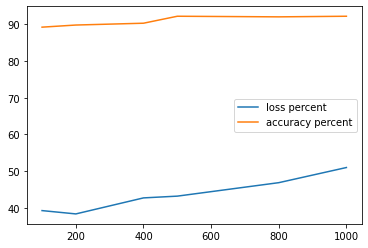

In [46]:
plt.plot(epoch_size, loss_percent, label = 'loss percent')
plt.plot(epoch_size, accuracy_percent, label = 'accuracy percent')
plt.legend()
plt.show()

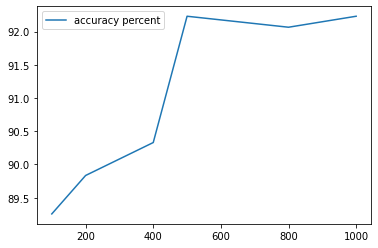

In [41]:
plt.plot(epoch_size, accuracy_percent, label = 'accuracy percent')
plt.legend()
plt.show()

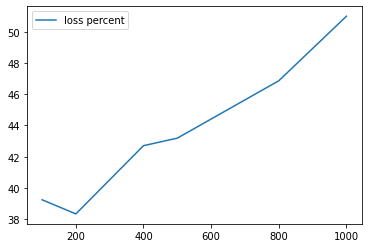

In [47]:
plt.plot(epoch_size, loss_percent, label = 'loss percent')
plt.legend()
plt.show()